<a href="https://colab.research.google.com/github/JakeOh/202511_BD53/blob/main/lab_ml/ml04_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris 데이터셋 분류

Setosa/Versicolor/Virginica 분류 - 다중 클래스 분류 문제

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets  # load_iris() 함수를 사용하기 위해서
from sklearn.model_selection import train_test_split  # 훈련/테스트 셋 분리
from sklearn.preprocessing import StandardScaler  # 표준화 특성 스케일링
from sklearn.neighbors import KNeighborsClassifier  # KNN 모델
from sklearn.metrics import confusion_matrix, classification_report  # 평가 지표

# Iris 데이터셋 준비

In [2]:
iris = datasets.load_iris()

In [5]:
print(type(iris))  #> Bunch 클래스 타입

<class 'sklearn.utils._bunch.Bunch'>


scikit-learn 패키지의 Bunch 클래스:
*   Python의 dict와 비슷한 클래스
*   key-value 쌍으로 아이템들을 저장하고 있음.
*   `bunch_name['key']` 또는 `bunch_name.key` 형식으로 key를 사용해서 value(값)을 참조할 수 있음.

In [6]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [9]:
x = iris.data  # x = iris['data'], 특성 배열(feature array)

In [12]:
y = iris.target  # iris['target'], 타겟 배열(target array)

In [14]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [16]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [17]:
x, y = datasets.load_iris(return_X_y=True)
#> 특성 배열(x), 타겟 배열(y)를 리턴.

In [20]:
iris_df = datasets.load_iris(as_frame=True)
#> 데이터, 타겟을 DataFrame 타입으로 생성한 Bunch 객체를 리턴.

In [22]:
print(type(iris_df))

<class 'sklearn.utils._bunch.Bunch'>


In [23]:
iris_df.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
iris_df.target

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


# 데이터 탐색

In [26]:
x[:6]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4]])

In [27]:
x.shape  #> (n_samples, n_features)

(150, 4)

In [28]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [29]:
y[:6]

array([0, 0, 0, 0, 0, 0])

In [30]:
y.shape  # (n_samples,)

(150,)

In [31]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [32]:
# 타겟의 비율
pd.Series(y).value_counts()

,count
0,50
1,50
2,50


# 훈련 셋, 테스트 셋 분리

train:test = 8:2, 층화 추출.

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

In [35]:
x_train.shape

(120, 4)

In [36]:
x_test.shape

(30, 4)

In [37]:
y_train.shape

(120,)

In [38]:
pd.Series(y_train).value_counts()

,count
0,40
2,40
1,40


In [39]:
y_test.shape

(30,)

In [40]:
pd.Series(y_test).value_counts()

,count
0,10
2,10
1,10


# 전처리(표준화 특성 스케일링)

In [41]:
std_scaler = StandardScaler()  # StandardScaler 객체 생성

In [42]:
x_tr_scaled = std_scaler.fit_transform(X=x_train)
#> fit_transform(): fit() 메서드 호출 후 찾은 평균과 표준편차를 사용해서 transform()까지 호출.
#> (주의) fit_transform() 메서드는 훈련 셋만 아규먼트로 전달. 테스트 셋에서는 사용하면 안됨!

In [43]:
x_tr_scaled[:6]

array([[-1.72156775, -0.33210111, -1.34572231, -1.32327558],
       [-1.12449223, -1.22765467,  0.41450518,  0.6517626 ],
       [ 1.14439475, -0.5559895 ,  0.58484978,  0.25675496],
       [-1.12449223,  0.11567567, -1.28894078, -1.45494479],
       [-0.40800161, -1.22765467,  0.13059752,  0.12508575],
       [ 0.54731923, -1.22765467,  0.69841284,  0.91510102]])

In [44]:
x_te_scaled = std_scaler.transform(X=x_test)
# 테스트 셋을 스케일링할 때는 fit 또는 fit_transform은 사용하면 안됨! transform만 사용!

In [46]:
x_te_scaled[:6]

array([[-1.72156775, -0.10821272, -1.40250384, -1.32327558],
       [ 0.30848902, -0.10821272,  0.64163131,  0.78343181],
       [-1.12449223, -1.45154306, -0.2668732 , -0.26992188],
       [-1.00507713, -1.67543145, -0.2668732 , -0.26992188],
       [-1.72156775,  0.33956406, -1.40250384, -1.32327558],
       [ 0.54731923,  0.56345245,  0.52806825,  0.52009339]])

# KNN 모델 생성, 훈련, 평가

In [47]:
knn = KNeighborsClassifier()  # KNN 모델 생성

In [48]:
knn.fit(X=x_tr_scaled, y=y_train)  # KNN 모델 훈련

KNeighborsClassifier()

In [49]:
train_pred = knn.predict(X=x_tr_scaled)  # 훈련 셋 예측값

In [50]:
train_pred[:10]

array([0, 1, 1, 0, 1, 2, 1, 2, 2, 2])

In [51]:
y_train[:10]

array([0, 2, 1, 0, 1, 2, 1, 2, 2, 2])

In [52]:
knn.score(X=x_tr_scaled, y=y_train)

0.975

In [53]:
conf_mat = confusion_matrix(y_true=y_train, y_pred=train_pred)
conf_mat

array([[40,  0,  0],
       [ 0, 39,  1],
       [ 0,  2, 38]])

레이블이 1인 샘플을 레이블 2로 잘못 예측한 것이 1개,
레이블이 2인 샘플을 레이블 1로 잘못 예측한 것이 2개.

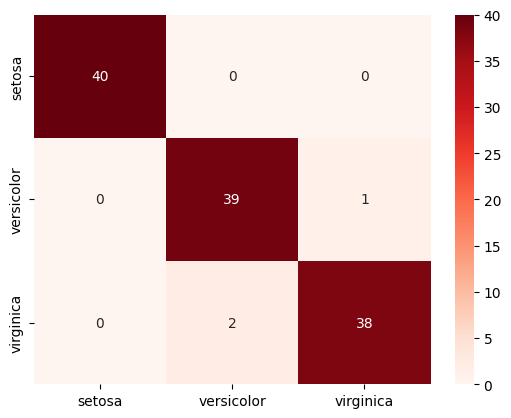

In [58]:
# 혼동 행렬(confusion matrix) 시각화
sns.heatmap(data=conf_mat, cmap='Reds', annot=True,
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.show()

In [59]:
print(classification_report(y_true=y_train, y_pred=train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.95      0.97      0.96        40
           2       0.97      0.95      0.96        40

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



# k값의 따른 정확도의 변화